In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [5]:
data = load_diabetes()

In [7]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [8]:
x = data.data
y = data.target

### training with LinearRegression

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2)

In [10]:
x_train.shape,x_test.shape

((331, 10), (111, 10))

In [14]:
lin = LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred = lin.predict(x_test)

In [18]:
print("R2 : ",r2_score(y_test,y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_pred,y_test)))

R2 :  0.4429562235529032
RMSE :  54.158589516891745


### training with Ridge Regression


In [37]:
ridge = Ridge(alpha=0.8)
ridge.fit(x_train,y_train)

Ridge(alpha=0.8)

In [38]:
y_pred = ridge.predict(x_test)

In [39]:
print("R2 : ",r2_score(y_test,y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 :  0.40084635384157297
RMSE :  56.168365398564625


### how the Ridge Regression reduces the overfitting ?

In [86]:
x = np.linspace(-3,3,200).reshape(200,1)
y = 0.7 * x**2 - 2 * x + 3 + 3*np.random.randn(200,1) 
x.shape

(200, 1)

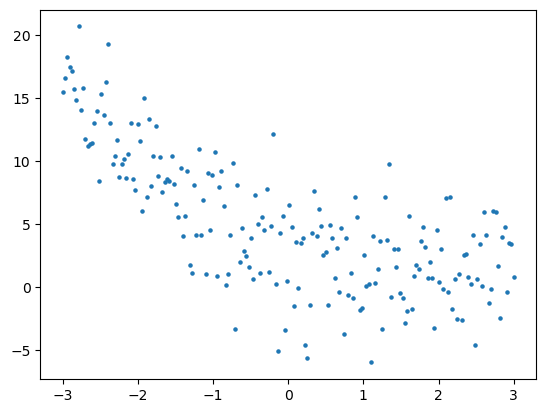

In [87]:
plt.scatter(x,y,s=5)

In [96]:
from sklearn.pipeline import Pipeline

def ridge_regression(x_train,y_train,alpha):
    pipe = Pipeline([
        ('ploynomial_transoform',PolynomialFeatures(degree=30)),
        ('ridge',Ridge(alpha=alpha))
    ])

    pipe.fit(x_train,y_train)
    return pipe.predict(x_train)


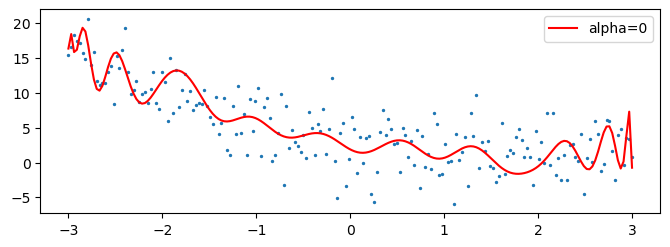

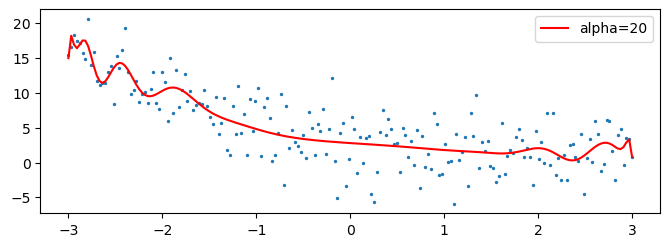

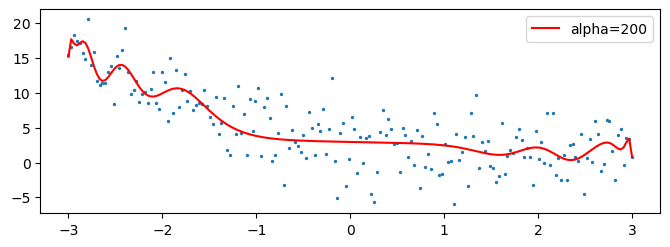

In [97]:

alphas = [0,20,200]
for i in range(len(alphas)):
    plt.figure(figsize=(8,9))
    plt.subplot(3,1,i+1)
    plt.scatter(x,y,s=2)
    plt.plot(x,ridge_regression(x,y,alphas[i]),label='alpha={}'.format(alphas[i]),color='red')
    plt.legend()